## Multi-linear Regression

Multi-linear Regression is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable. It is used to determine a mathematical relationship among a number of random variables. In other terms, MLR examines how multiple independent variables are related to one dependent variable. Once each of the independent factors has been determined to predict the dependent variable, the information on the multiple variables can be used to create an accurate prediction on the level of effect they have on the outcome variable. The model creates a relationship in the form of a straight line (linear) that best approximates all the individual data points.



#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as scipy
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean,stdev
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

c:\users\sibusiso fikizolo\miniconda3.7\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#importing data
df = pd.read_csv('data/salary.csv')

In [3]:
#Checking for missing values
value = df.isnull().sum().sum()
print('Number of missing values: ',value)

Number of missing values:  1


- There is only one missing value in salary

In [4]:
#filling in the missing values
df['salary'].fillna(df['salary'].mean(),inplace = True)

- Filling the missing value in salary with the mean of salary because maybe we might need that data

### 1. Split your data into a training and test set. Create scatterplots, histograms, and a descriptive statistics table of the variables of interest. Do any of the variables need to be transformed to be able to use them in a linear regression model? Which variables seem like good predictors of salary?

In [5]:
# checking features with strong correllation
df2 = df.corr()[abs(df.corr()["salary"]) > 0.45].sort_values(by=["salary"], ascending=False)
df2

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119946,0.623135,0.610580,0.407208,0.044552,0.167129,0.701354,0.361447,-0.498485,-0.069622
position,0.701354,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
yearsworked,0.623135,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610580,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
Field,-0.498485,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


- By observing the above DataFrame we see a correlation in some of the features which are:
    - Position
    - Yearsrank
    - Yearsworked
    - Field
    
Of which they highly correllated with our dependant variable.

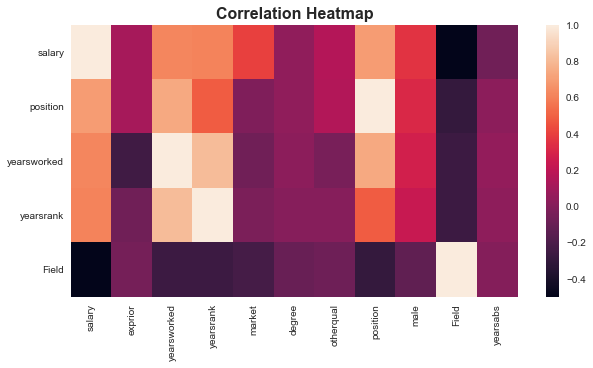

In [6]:
#correllation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df2)
plt.title('Correlation Heatmap', weight='bold', fontsize=16)
plt.show()

####  Descriptive statistics table of the variables of interest 

In [7]:
#descriptive statistics
df3 = df[['salary','yearsworked','yearsrank','position','Field']].describe()
df3

,salary,yearsworked,yearsrank,position,Field
count,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,12.852140,7.052529,2.132296,2.529183
std,12672.762650,9.444695,6.414771,0.820075,1.127420
min,29000.000000,0.000000,0.000000,1.000000,1.000000
25%,40000.000000,4.000000,2.000000,1.000000,2.000000
50%,50165.500000,12.000000,5.000000,2.000000,3.000000
75%,60306.250000,22.000000,12.000000,3.000000,4.000000
max,96156.000000,41.000000,28.000000,3.000000,4.000000


#### Histogram of features of interest

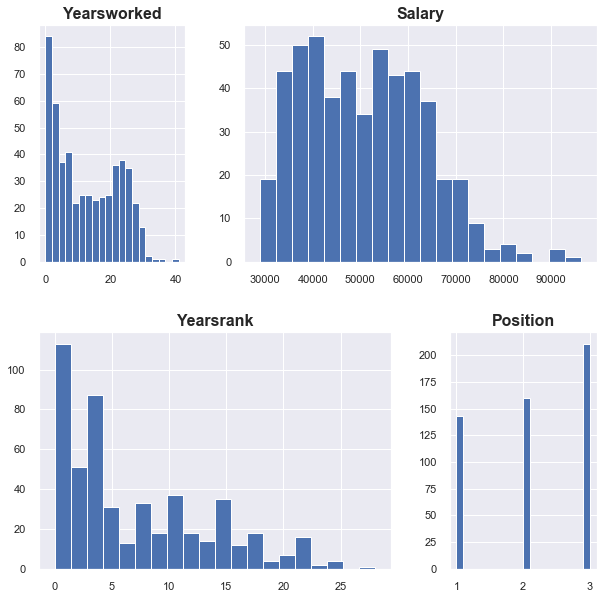

In [8]:
sns.set()
f, axes = plt.subplots(1, 2,figsize=(10, 10))
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.hist(df.yearsworked, bins=20)
plt.title('Yearsworked', weight='bold', fontsize=16)

plt.subplot(grid[0, 1:])
plt.hist(df.salary, bins=20)
plt.title('Salary', weight='bold', fontsize=16)

plt.subplot(grid[1, :2])
plt.hist(df.yearsrank, bins=20)
plt.title('Yearsrank', weight='bold', fontsize=16)

plt.subplot(grid[1, 2])
plt.hist(df.position, bins=20)
plt.title('Position', weight='bold', fontsize=16)
plt.show()

##### Salary
- it is skewed to the right
- Majority of the people earn between 35000 dollars & 60000 dollars

##### Years worked
- There are possible outliers 
- it is skewed to the right

##### Yearsrank
- It is skewed to the right
- There are possible outliers
- A handful of people have worked at the current rank for years between 0 & 5 years.


<Figure size 360x360 with 0 Axes>

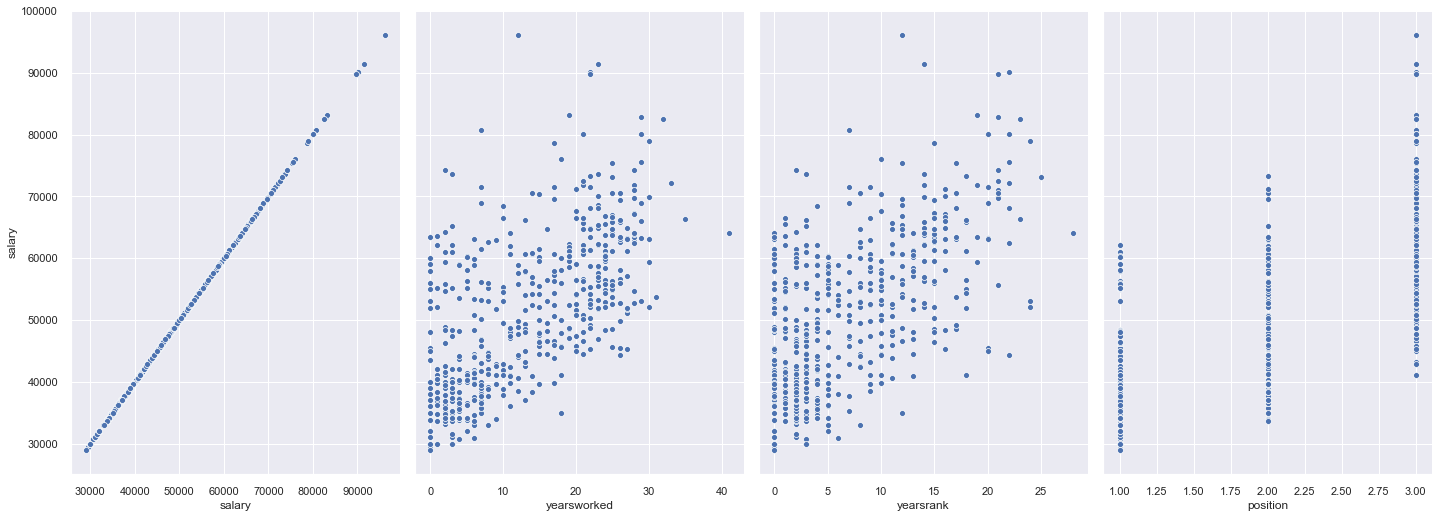

In [9]:
plt.figure(figsize=(5,5))
sns.pairplot(df, x_vars=['salary','yearsworked','yearsrank','position'],
             y_vars='salary',height=7, aspect=0.7, kind='scatter')
plt.show()

#### - One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas’ get_dummies() function for this.

In [10]:
dummies = pd.get_dummies(df['Field'])
# dummies.drop(3, inplace=True, axis=1)

new = dummies.rename(columns={1:'Engineering',2:'Finance',3:'HR',4:'Marketing'})

df4 = pd.concat([df, new] ,axis=1, ignore_index=False)
df4.drop("Field", inplace=True, axis=1)
df4.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Engineering,Finance,HR,Marketing
0,53000.0,0,0,0,1.17,1,0,1,1,0,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,2,0,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,1,0,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,1,0,0,0,1


#### - Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

In [11]:
df4.corr()
df4.drop('salary', axis = 1)

,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Engineering,Finance,HR,Marketing
0,0,0,0,1.17,1,0,1,1,0,0,0,1,0
1,1,0,0,1.24,1,0,1,1,0,0,1,0,0
2,0,0,0,1.21,1,0,1,1,2,0,0,1,0
3,0,2,1,0.99,1,0,1,1,1,0,0,0,1
4,0,2,2,0.91,1,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,6,17,11,0.92,1,0,2,0,70,0,1,0,0
510,6,19,7,0.86,1,0,3,0,72,1,0,0,0
511,19,7,6,0.78,1,0,3,0,76,0,0,0,1
512,8,20,10,0.78,1,0,3,0,78,0,1,0,0


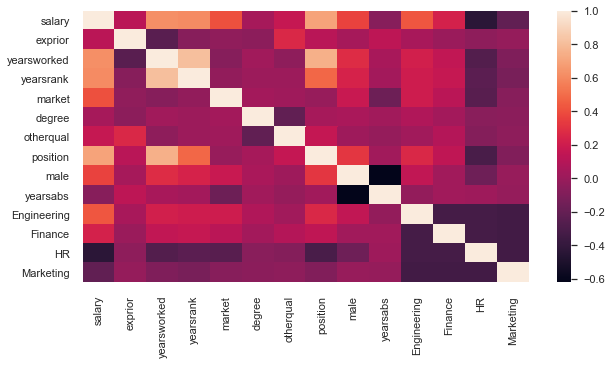

In [12]:
plt.figure(figsize=(10,5))
new_corr = sns.heatmap(df4.corr())

In [13]:
train = df4.drop(['exprior','market','degree','otherqual','male','yearsabs'], axis = 1)
train.head()

,salary,yearsworked,yearsrank,position,Engineering,Finance,HR,Marketing
0,53000.0,0,0,1,0,0,1,0
1,58000.0,0,0,1,0,1,0,0
2,45500.0,0,0,1,0,0,1,0
3,35782.0,2,1,1,0,0,0,1
4,34731.0,2,2,1,0,0,0,1


In [14]:
pos = pd.get_dummies(df4.position, prefix = 'Position')
pos.drop('Position_3', inplace=True, axis=1)
pos = pos.rename(columns={"Position_1": "Junior Employee", "Position_2": "Manager", "Position_3":"Executive"})

In [15]:
data = [train, pos]
data = pd.concat(data, axis=1)
data.head()

,salary,yearsworked,yearsrank,position,Engineering,Finance,HR,Marketing,Junior Employee,Manager
0,53000.0,0,0,1,0,0,1,0,1,0
1,58000.0,0,0,1,0,1,0,0,1,0
2,45500.0,0,0,1,0,0,1,0,1,0
3,35782.0,2,1,1,0,0,0,1,1,0
4,34731.0,2,2,1,0,0,0,1,1,0


#### Splitting data

We have split the data into Train (75%) and Test (25%) sets. We will be working for the most part on our Train set to help train our model and make a few predictions on the test data. Why we split right now in light of the fact that the preparation set contains a known yield and the model learns on this information so as to be summed up to other data later on. We have the test dataset so as to test our model's predictions on this subset.

In [16]:
#splitting data
x = data.drop(['salary','position','yearsrank'], axis = 1)
y = data.salary

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

#### - Use multiple linear regression to predict salary from all the variables in the training dataset. Interpret the standardised coefficients given in the statsmodels output.

In [18]:
# fit the model to the training data
lm= sm.OLS(y_train,x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     104.5
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           4.36e-75
Time:                        11:39:35   Log-Likelihood:                -3724.1
No. Observations:                 359   AIC:                             7462.
Df Residuals:                     352   BIC:                             7489.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
yearsworked       223.8964     62.144      3.603      0.000     101.676     346.116
Engineering      6.116e+04   1542.283     39.658      0.000    5.81e+04    6.42e+04
Finance          5.798e+04   1572.981     36.862      0.000    5.49e+04    6.11e+04
HR               5.016e+04   1637.978     30.622      0.000    4.69e+04    5.34e+04
Marketing        5.215e+04   1589.847     32.801      0.000     4.9e+04    5.53e+04
Junior Employee -1.438e+04   1487.064     -9.670      0.000   -1.73e+04   -1.15e+04
Manager         -9929.9584   1137.047     -8.733      0.000   -1.22e+04   -7693.698
==============================================================================
Omnibus:                       57.582   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.469
Skew:                           0.963   Prob(JB):                     8.33e-21
Kurtosis:                       4.573   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Standardised Coefficient
lm.params

yearsworked          223.896416
Engineering        61163.899145
Finance            57983.072655
HR                 50158.545597
Marketing          52149.098554
Junior Employee   -14380.502615
Manager            -9929.958358
dtype: float64

#### - Calculate the standardised residuals and standardised predicted values.

In [20]:
#Creating residuals
residual  = lm.resid

#Fitting the vaules to model
pred_val = lm.fittedvalues

##### Residual Plot

Text(0, 0.5, 'Residuals')

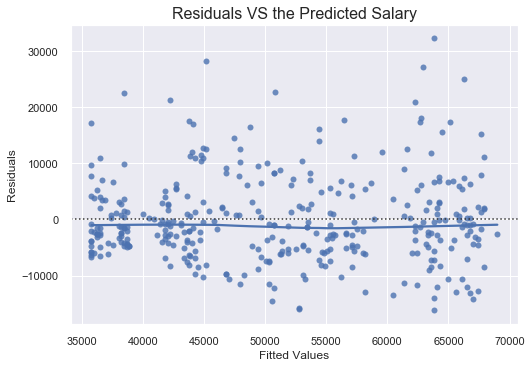

In [21]:
#Plotting the residuals versus the predicted values
sns.residplot(x = pred_val, y = residual, lowess=True)

plt.title('Residuals VS the Predicted Salary', fontsize=16)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

In [38]:
regression = LinearRegression().fit(x_train, y_train)

# RMSE: test data
print('TEST RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, regression.predict(x_test))))

# RMSE: train data
print('TRAINING RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_train, regression.predict(x_train))))

TEST RMSE: 7262.758585762729
TRAINING RMSE: 7743.392477099224


#### Insights

The RMSE scores shows signs of overfitting as observered the test is lower than the train values

## OOP FOR DATA SCIENCE

In [23]:
class ErrorCalculator():
    def __init__(self, y_test, Y_predict):
        self.y_test = y_test
        self.Y_predict = Y_predict
    
    def get_residuals(self):
        return self.y_test - self.Y_predict
    
    def get_standardised_residuals(self):
        return self.get_residuals() / self.get_residuals().std()
    
    def get_mse(self):
        return np.square(np.subtract(self.y_test, self.Y_predict)).mean()
    
    def get_rmse(self):
        return np.sqrt(((self.Y_predict - self.y_test) ** 2).mean())
    
    def error_summary(self):
        return pd.DataFrame({"Standardised Residuals Average Mean" : [self.get_standardised_residuals().mean()],
                             "Standardised Residuals Average Min": [self.get_standardised_residuals().min()],
                             "Standardised Residuals Average Max": [self.get_standardised_residuals().max()],
                             "MSE": [self.get_mse()],
                             "RMSE": [self.get_rmse()]},
                             columns= ["Standardised Residuals Average Mean",
                                     "Standardised Residuals Average Min",
                                     "Standardised Residuals Average Max",
                                     "MSE",
                                     "RMSE"])

class Plotter():
    def __init__(self,y_test,ypred):
        self.y_test = y_test
        self.ypred = ypred
    
    def run_calculations(self):
        return self.y_test - self.ypred
    
    def plot(self):
        plt.hist(self.y_test - self.ypred)
        plt.title('Residuals Plot for predictions')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        return plt.show()   
    
class HistogramPlotter(Plotter):
    def __init__(self, y_test,ypred):
        Plotter.__init__(self, y_test, ypred)
        
class ScatterPlotter(Plotter):
    def __init__(self, y_test, ypred):
        Plotter.__init__(self, y_test, ypred)

    def plot(self):
        chart = pd.DataFrame({"y_test": self.y_test, "y_prediction": self.ypred})
        chart.plot.scatter(x="y_test", y="y_prediction", c="DarkBlue")
        plt.title("Prediction vs Actual values")
        plt.xlabel("Actual")
        plt.ylabel("Prediction")
        return plt.show()

In [69]:
df_= df4.drop(['Engineering'], axis = 1)

In [70]:
# Splitting the data for model 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(
   df_.drop(labels=["salary"], axis=1),
    df_["salary"],
    test_size = 0.3,
    random_state = 42)

#### Model 1

In [71]:
# Building Model 1
model1 = sm.add_constant(X_train1)
model1 = sm.OLS(y_train1, model1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 14 Apr 2020   Prob (F-statistic):          2.23e-119
Time:                        12:39:53   Log-Likelihood:                -3590.2
No. Observations:                 359   AIC:                             7206.
Df Residuals:                     346   BIC:                             7257.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6322.9157   2931.735      2.157      0.032     556.651    1.21e+04
exprior       176.4131     82.340      2.143      0.033      14.464     338.362
yearsworked  -109.9087     96.987     -1.133      0.258    -300.667      80.850
yearsrank     768.6775     90.076      8.534      0.000     591.513     945.842
market       2.914e+04   2157.121     13.508      0.000    2.49e+04    3.34e+04
degree       -615.2965   1495.765     -0.411      0.681   -3557.232    2326.639
otherqual    1009.5818   1441.047      0.701      0.484   -1824.733    3843.896
position     7525.6823    724.008     10.394      0.000    6101.671    8949.694
male          688.0969    992.135      0.694      0.488   -1263.278    2639.472
yearsabs      -27.6361     23.603     -1.171      0.242     -74.059      18.787
Finance     -1701.2199    822.307     -2.069      0.039   -3318.570     -83.870
HR          -6354.1037    937.430     -6.778      0.000   -8197.882   -4510.325
Marketing   -5473.2986    859.413     -6.369      0.000   -7163.630   -3782.967
==============================================================================
Omnibus:                       23.112   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.706
Skew:                           0.448   Prob(JB):                     1.76e-08
Kurtosis:                       4.258   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 2

In [72]:
# duplicating dataset
data_2 = df_.copy()

# dropping yearsrank as per instruction
data_2 = data_2.drop("yearsrank", axis=1)

In [73]:
# Splitting the data for model 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(
   data_2.drop(labels=["salary"], axis=1),
    data_2["salary"],
    test_size = 0.3,
    random_state = 42)

In [74]:
# Building Model 2
model2 = sm.add_constant(X_train2)
model2 = sm.OLS(y_train2, X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     110.4
Date:                Tue, 14 Apr 2020   Prob (F-statistic):          3.65e-106
Time:                        12:40:21   Log-Likelihood:                -3624.5
No. Observations:                 359   AIC:                             7273.
Df Residuals:                     347   BIC:                             7320.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8270.4429   3211.115      2.576      0.010    1954.744    1.46e+04
exprior       473.1718     81.997      5.771      0.000     311.898     634.446
yearsworked   557.1337     63.079      8.832      0.000     433.068     681.199
market       3.014e+04   2366.336     12.739      0.000    2.55e+04    3.48e+04
degree         54.9283   1641.023      0.033      0.973   -3172.676    3282.532
otherqual    2476.1368   1571.877      1.575      0.116    -615.469    5567.743
position     4209.0353    671.097      6.272      0.000    2889.106    5528.964
male          447.5221   1089.548      0.411      0.682   -1695.428    2590.472
yearsabs      -42.4599     25.860     -1.642      0.102     -93.322       8.402
Finance     -1739.8831    903.397     -1.926      0.055   -3516.705      36.939
HR          -7221.3850   1023.817     -7.053      0.000   -9235.054   -5207.716
Marketing   -6133.5652    940.342     -6.523      0.000   -7983.053   -4284.078
==============================================================================
Omnibus:                       45.019   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.468
Skew:                           0.712   Prob(JB):                     4.55e-19
Kurtosis:                       4.903   Cond. No.                         254.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ErrorCalculator

In [81]:
model1_errors = ErrorCalculator(y_test1, model1.predict(sm.add_constant(X_test1)))
model2_errors = ErrorCalculator(y_test2, model2.predict(sm.add_constant(X_test2)))

# MSE 
print("Model1 MSE:\t\t{}".format(model1_errors.get_mse()))
print("Model2 MSE:\t\t{}".format(model2_errors.get_mse()))

Model1 MSE:		34108524.06673616
Model2 MSE:		38860818.14182102


In [82]:
# RMSE
print("Model1 RMSE:\t\t{}".format(model1_errors.get_rmse()))
print("Model2 RMSE:\t\t{}".format(model2_errors.get_rmse()))

Model1 RMSE:		5840.250342813753
Model2 RMSE:		6233.8445715161215


#### HistogramPlotter and ScatterPlotter visualisations

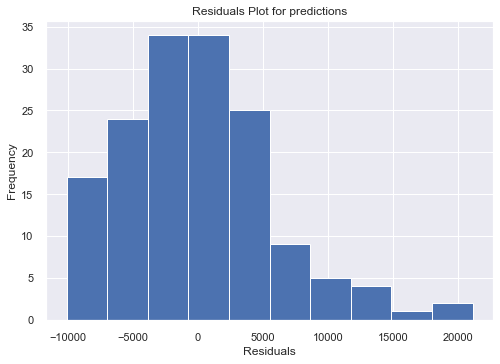

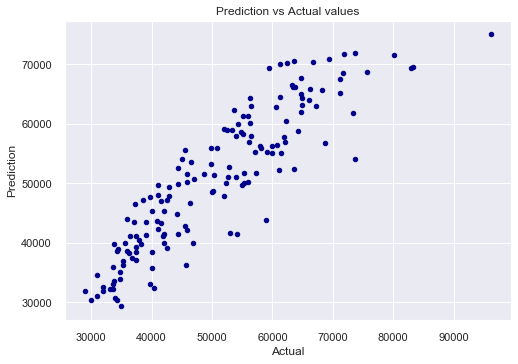

In [88]:
#Model 1 plotting graphs
model1_plot = HistogramPlotter(y_test1, model1.predict(sm.add_constant(X_test1)))
model1_scatter = ScatterPlotter(y_test1, model1.predict(sm.add_constant(X_test1)))

# Mode1 Histogram Plot
model1_plot.plot()

#model1 Scatter Plot
model1_scatter.plot()

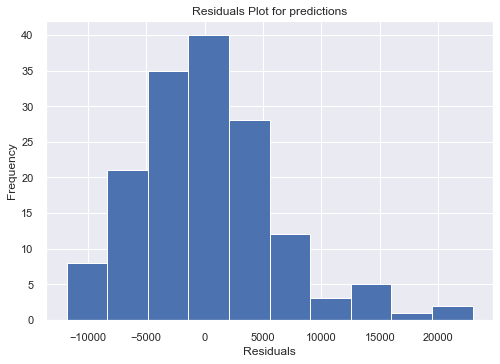

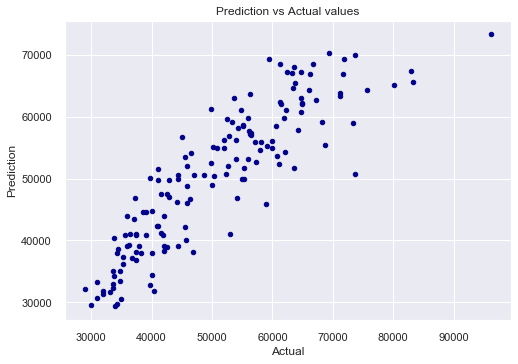

In [89]:
# Model 2 plotting graphs
model2_plot = HistogramPlotter(y_test2, model2.predict(sm.add_constant(X_test2)))
model2_scatter = ScatterPlotter(y_test2, model2.predict(sm.add_constant(X_test2)))

# Model 2 Histogram Plot
model2_plot.plot()

# Model 2 Scatter Plot
model2_scatter.plot()

In [91]:
# Calculations for Standard Residuals.
influence = model1.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance
standardized_residuals = influence.resid_studentized_internal
studentized_residuals = influence.resid_studentized_external
studentized_residuals = pd.DataFrame(studentized_residuals)